# Exam - CNN for protein subcellular location

The goal of the exam is to implement a CNN to classify the dataset presented in notebook 02 (subcellular localisation dataset).

Please send a notebook named **name_surname.ipynb** at wandrille.duchemin [at] unibas.ch **at most 1 week after the end of the course**.

<br>

---

<br>

The subcellular data comes from: https://academic.oup.com/bioinformatics/article/33/21/3387/3931857


Here is the code to read the data in order to get you started:


In [1]:
from collections import defaultdict , Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the encoded protein sequences, and labels 

train = np.load('data/subcellular_localization/reduced_train.npz')
X_train = train['X_train']
y_train = train['y_train']

print(X_train.shape)

(2423, 400, 20)


In [3]:
validation = np.load('data/subcellular_localization/reduced_val.npz')
X_valid = validation['X_val']
y_valid = validation['y_val']

print(X_valid.shape)

(635, 400, 20)


In [4]:
classes = ['Nucleus',
           'Cytoplasm',
           'Extracellular',
           'Mitochondrion',
           'Cell membrane',
           'ER',
           'Chloroplast',
           'Golgi apparatus',
           'Lysosome',
           'Vacuole']

dico_classes_subcell={i:v for i,v in enumerate(classes)}

for i in dico_classes_subcell.keys():
    print('Target', i, dico_classes_subcell[i])

Target 0 Nucleus
Target 1 Cytoplasm
Target 2 Extracellular
Target 3 Mitochondrion
Target 4 Cell membrane
Target 5 ER
Target 6 Chloroplast
Target 7 Golgi apparatus
Target 8 Lysosome
Target 9 Vacuole


Let's look at the target categories

<Axes: xlabel='count'>

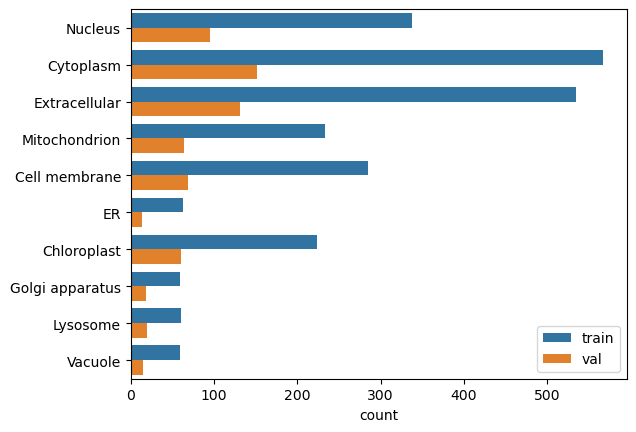

In [5]:
sns.countplot(y = [ dico_classes_subcell[y] for y in  y_train ] + [ dico_classes_subcell[y] for y in  y_valid ] ,
              hue = ['train']*len(y_train) + ['val']*len(y_valid),
              order = classes )

Each sequence is encoded as a matrix where each position is a row of size 20, for each possible amino-acid.

The values withing the matrix represent the amino acid frequency at the given position.

Naturally, on one hand the proteins have different sizes, but on the other our neural network will require a fixed input size, thus, each position after the last contains only zeroes.   

In [6]:
X_train[0,]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(400, 20), dtype=float32)

In [7]:
X_train[0,3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.], dtype=float32)

<Axes: >

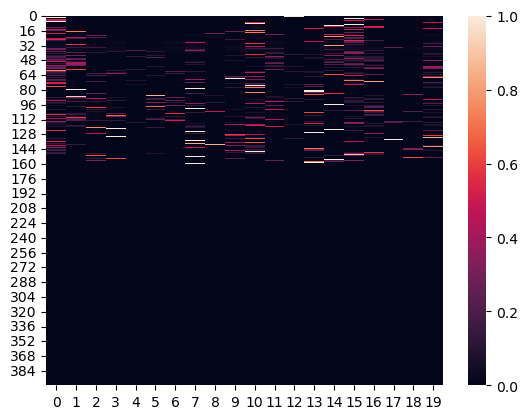

In [8]:
sns.heatmap( X_train[0,] )

In [9]:
X_train[0,0:16]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.49, 0.  , 0.  , 0.  ],
       [0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.51, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0. 

Your task is to implement a Convolutional Neural Network on this data and see if that can help you improve the performance we got from the simple network we implemented during the course.


**Setting performance expectations:**

In the source paper, using a different, more complex type of model, they report a total accuracy of 0.7797, and their balanced accuracy can be deduced from the confusion matrix they report : 0.648.

So here, we have an idea of the scope of performance we can achieve. 
We should also note that in the original paper they focused on (unbalanced) accuracy, so while I doubt our model can surpass their reported accuracy, it is possible we end up with a higher balanced accuracy.